# 교차검증을 이용한 옵티마이저 비교

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate

In [2]:
# load dataset
(x_train, y_train),(x_test,y_test) = fashion_mnist.load_data()

# 차수 변경 & 표준화
x_train = x_train.reshape(-1,28*28).astype(np.float32)/255.0
x_test = x_test.reshape(-1,28*28).astype(np.float32)/255.0

# one hot encoding
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# L = 5
n_input = 784  # x_train 출력 값
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10   # y_train 출력 값

# 하이퍼매개변수
batch_size = 256
n_epoch = 2
k = 2

In [3]:
def build_model():
    model = Sequential()
    model.add(Dense(units=n_hidden1,input_shape=(n_input,), activation = 'relu'))
    model.add(Dense(units=n_hidden2, activation = 'relu'))
    model.add(Dense(units=n_hidden3, activation = 'relu'))
    model.add(Dense(units=n_hidden4, activation = 'relu'))
    model.add(Dense(units=n_output, activation = 'softmax'))
    return model

In [4]:
temp = pd.DataFrame({'data' : range(10,30)})
list(KFold(k).split(temp))

[(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
  array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])),
 (array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
  array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]))]

In [5]:
# cross_validata(모델. x,y, scoring = 'accuracy', cv = 5)

In [6]:
def cross_val(opt):
    accuracy = []
    for train_index, val_index in KFold(k).split(x_train):
        xtrain, xval = x_train[train_index], x_train[val_index]
        ytrain, yval = y_train[train_index], y_train[val_index]
        model = build_model()
        model.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer = opt, metrics = ['accuracy'])
        model.fit(xtrain, ytrain, batch_size = batch_size, epochs = n_epoch, verbose = 0)
        accuracy.append(model.evaluate(xval,yval))
    return accuracy

In [7]:
# 4개 모델에 대해서 교차 검증 수행

sgd = cross_val(SGD())
adam = cross_val(Adam())
adagrad = cross_val(Adagrad())
rmsprop = cross_val(RMSprop())

938/938 [==============================] - 3s 3ms/step - loss: 0.5795 - accuracy: 0.7803


In [8]:
print(np.array(sgd).mean(axis=0)[1])
print(np.array(adam).mean(axis=0)[1])
print(np.array(adagrad).mean(axis=0)[1])
print(np.array(rmsprop).mean(axis=0)[1])

0.7272499799728394
0.8399333357810974
0.6537666618824005
0.7680166661739349


In [9]:
print(sgd)
[i[1] for i in sgd]

[[0.8329430222511292, 0.7282999753952026], [0.8401323556900024, 0.7261999845504761]]


[0.7282999753952026, 0.7261999845504761]

In [10]:
import seaborn as sns
temp = pd.DataFrame(data = [
[i[1] for i in sgd],
[i[1] for i in adam],
[i[1] for i in adagrad],
[i[1] for i in rmsprop],
]).T
temp.columns = ['sgd','adam','adagrad','rmsprop']
temp

,sgd,adam,adagrad,rmsprop
0,0.7283,0.853633,0.655200,0.755700
1,0.7262,0.826233,0.652333,0.780333


<AxesSubplot:>

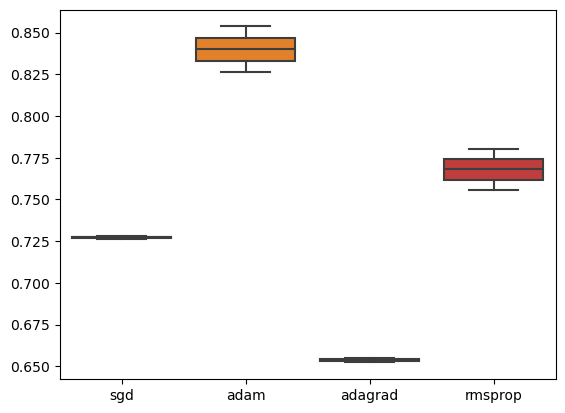

In [11]:
sns.boxplot(data = temp)